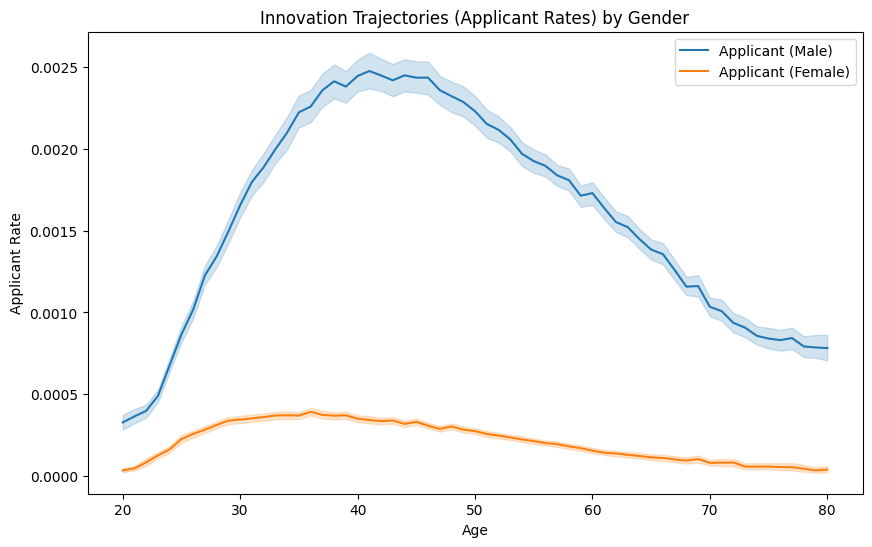

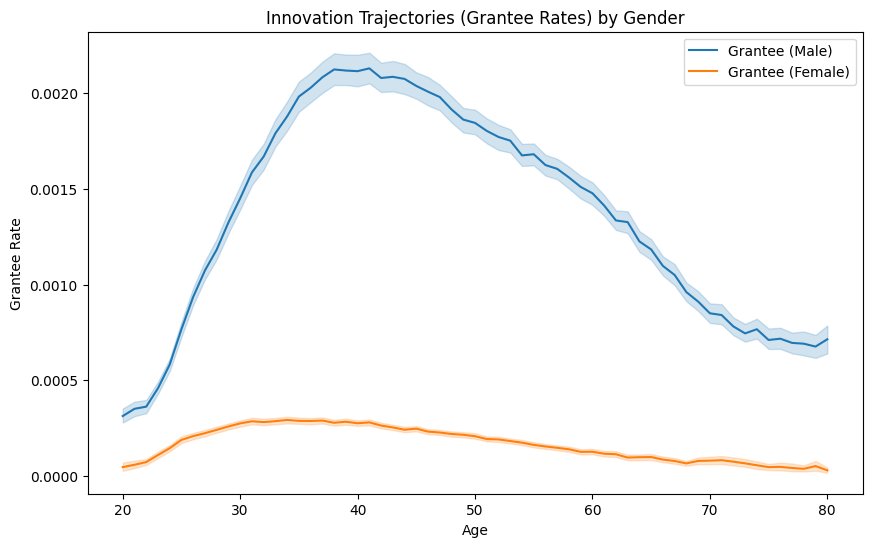

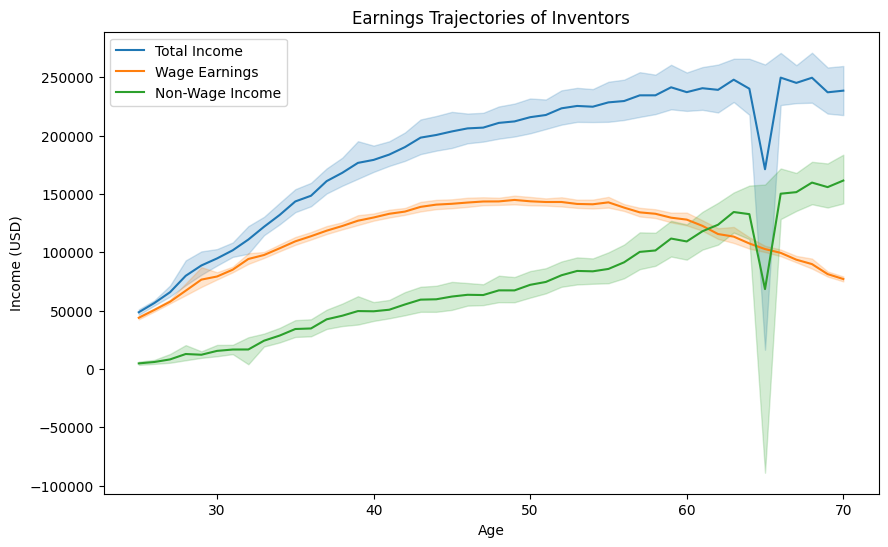

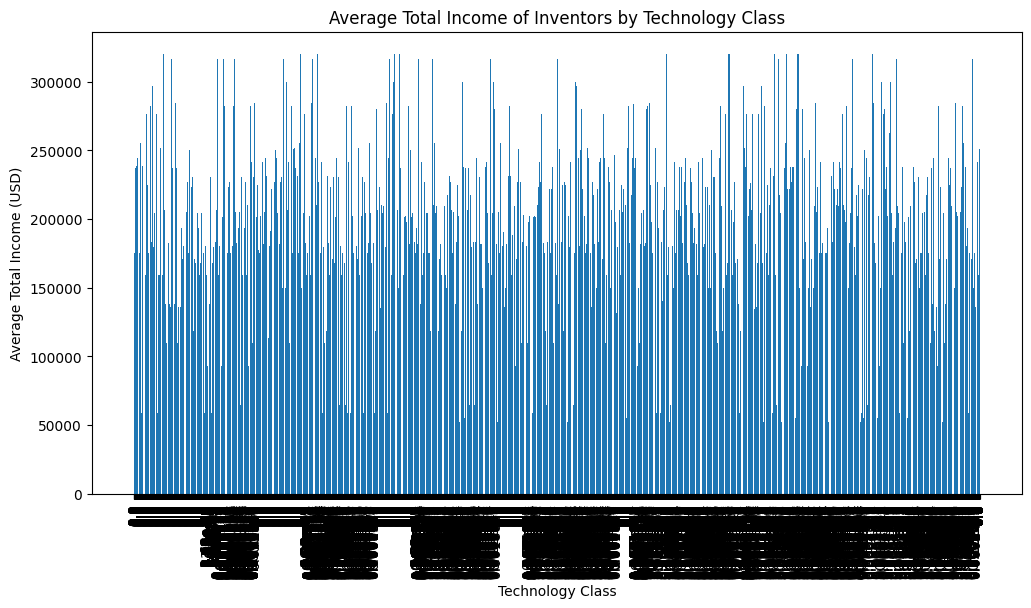

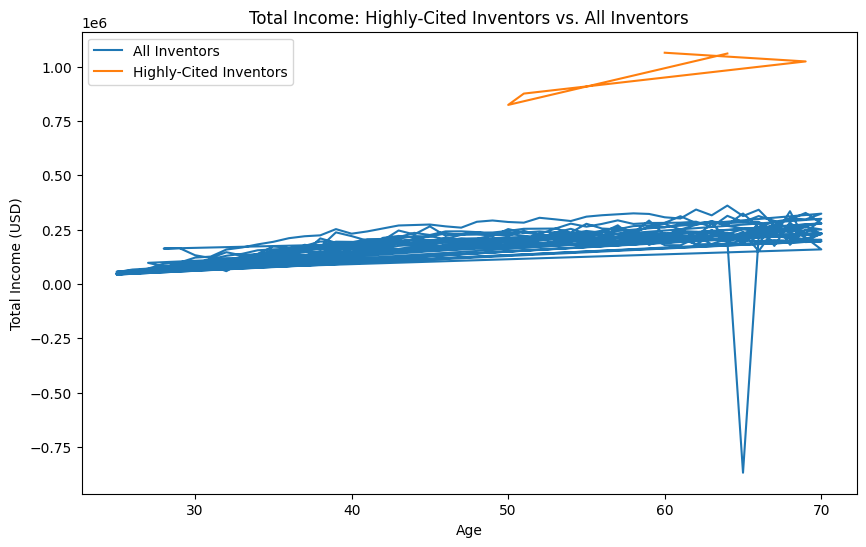

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from tables
table2a = pd.read_csv('./code_and_data/data/excel/table_2a.csv')
table2b = pd.read_csv('./code_and_data/data/excel/table_2b.csv')
table4a = pd.read_csv('./code_and_data/data/excel/table_4a.csv')
table4b = pd.read_csv('./code_and_data/data/excel/table_4b.csv')


# Part 1: Lifecycle trajectories of innovation and earnings by inventor subgroup

# 1.1. Innovation trajectories
# Extract applicant and grantee rates by age and gender
applicant_by_age_gender = table2a.groupby(['age', 'applicant_g_m', 'applicant_g_f'])['applicant'].mean().reset_index()
grantee_by_age_gender = table2a.groupby(['age', 'grantee_g_m', 'grantee_g_f'])['grantee'].mean().reset_index()

# Plot innovation trajectories by gender
plt.figure(figsize=(10, 6))
sns.lineplot(data=applicant_by_age_gender, x='age', y='applicant_g_m', label='Applicant (Male)')
sns.lineplot(data=applicant_by_age_gender, x='age', y='applicant_g_f', label='Applicant (Female)')
plt.title('Innovation Trajectories (Applicant Rates) by Gender')
plt.xlabel('Age')
plt.ylabel('Applicant Rate')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.lineplot(data=grantee_by_age_gender, x='age', y='grantee_g_m', label='Grantee (Male)')
sns.lineplot(data=grantee_by_age_gender, x='age', y='grantee_g_f', label='Grantee (Female)')
plt.title('Innovation Trajectories (Grantee Rates) by Gender')
plt.xlabel('Age')
plt.ylabel('Grantee Rate')
plt.legend()
plt.show()

# 1.2. Earnings trajectories
# Extract earnings by age
earnings_by_age = table4a[['age', 'total_inc_mean', 'w2_inc_mean', 'nw_inc_mean']]

# Plot earnings trajectories
plt.figure(figsize=(10, 6))
sns.lineplot(data=earnings_by_age, x='age', y='total_inc_mean', label='Total Income')
sns.lineplot(data=earnings_by_age, x='age', y='w2_inc_mean', label='Wage Earnings')
sns.lineplot(data=earnings_by_age, x='age', y='nw_inc_mean', label='Non-Wage Income')
plt.title('Earnings Trajectories of Inventors')
plt.xlabel('Age')
plt.ylabel('Income (USD)')
plt.legend()
plt.show()

# Part 2: Earnings differences across technology classes and highly-cited inventors

table2a = table2a.sample(frac=0.1, random_state=42)  # Sample 10% of rows
table2b = table2b.sample(frac=0.1, random_state=42)  # Sample 10% of rows
table4a = table4a.sample(frac=0.1, random_state=42)  # Sample 10% of rows
table4b = table4b.sample(frac=0.1, random_state=42)  # Sample 10% of rows

# 2.1. Earnings by technology class
# Merge grantee rates by technology class with earnings data
tech_class_earnings = pd.merge(table2a[['year', 'age', 'grantee_cat_1', 'grantee_cat_2', 'grantee_cat_3',
                                        'grantee_cat_4', 'grantee_cat_5', 'grantee_cat_6', 'grantee_cat_7']],
                               table4a[['year', 'age', 'total_inc_mean', 'w2_inc_mean', 'nw_inc_mean']],
                               on=['year', 'age'], how='inner')

# Calculate average earnings by technology class
tech_class_mean_earnings = tech_class_earnings.groupby(['grantee_cat_1', 'grantee_cat_2', 'grantee_cat_3',
                                                        'grantee_cat_4', 'grantee_cat_5', 'grantee_cat_6',
                                                        'grantee_cat_7'])['total_inc_mean'].mean().reset_index()
tech_class_mean_earnings = tech_class_mean_earnings.melt(id_vars=['total_inc_mean'], value_name='tech_class')

# Plot earnings by technology class
plt.figure(figsize=(12, 6))
plt.bar(range(len(tech_class_mean_earnings)), tech_class_mean_earnings['total_inc_mean'].values)
plt.xticks(range(len(tech_class_mean_earnings)), tech_class_mean_earnings['tech_class'].values, rotation=90)
plt.title('Average Total Income of Inventors by Technology Class')
plt.xlabel('Technology Class')
plt.ylabel('Average Total Income (USD)')
plt.show()

# 2.2. Earnings of highly-cited inventors
# Extract earnings of highly-cited inventors
highly_cited_earnings = table4b[['age', 'total_inc_top5cit_mean', 'w2_inc_top5cit_mean', 'nw_inc_top5cit_mean']]

# Compare with earnings of all inventors
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(earnings_by_age['age'], earnings_by_age['total_inc_mean'], label='All Inventors')
ax.plot(highly_cited_earnings['age'], highly_cited_earnings['total_inc_top5cit_mean'], label='Highly-Cited Inventors')
ax.set_title('Total Income: Highly-Cited Inventors vs. All Inventors')
ax.set_xlabel('Age')
ax.set_ylabel('Total Income (USD)')
ax.legend()
plt.show()